<a href="https://colab.research.google.com/github/prpawan03/marvel-lvl2/blob/main/Task5/xgboost_stock2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:


!pip install finta


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
plt.style.use(style = 'seaborn')
%matplotlib inline

<ipython-input-39-d0d9f0614482>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style = 'seaborn')


In [40]:
stock = ['TSLA']
df = yf.download(stock,"2017-01-01","2024-02-01")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09,15.264667,15.461333,15.200000,15.418667,15.418667,59692500
...,...,...,...,...,...,...
2024-01-25,189.699997,193.000000,180.059998,182.630005,182.630005,198076800
2024-01-26,185.500000,186.779999,182.100006,183.250000,183.250000,107343200
2024-01-29,185.630005,191.479996,183.669998,190.929993,190.929993,125013100


Text(0, 0.5, 'Price in USD($)')

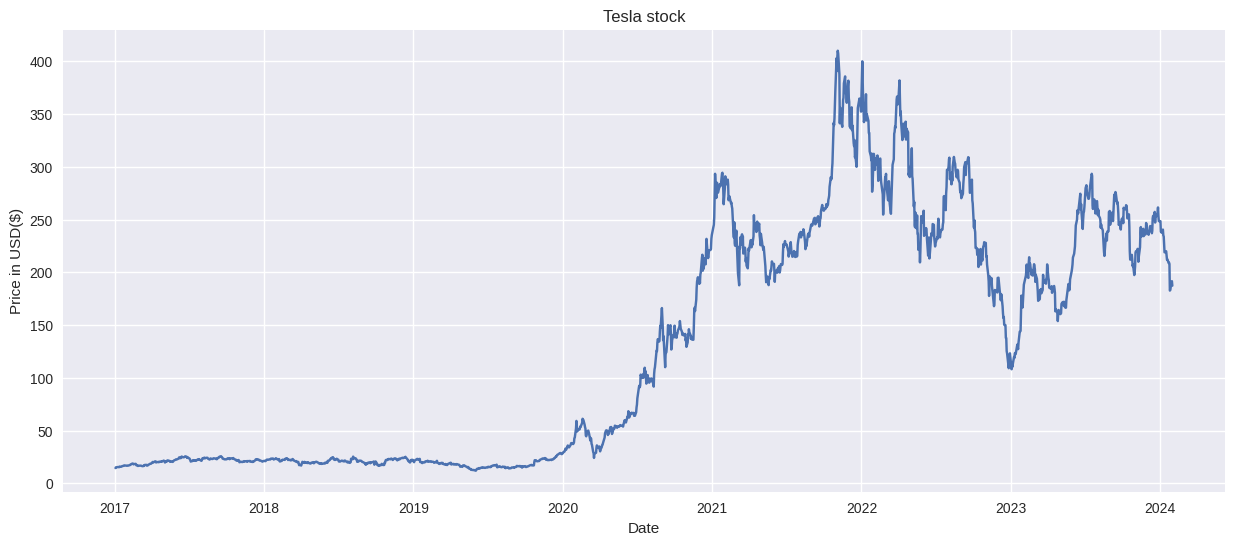

In [41]:
plt.figure(figsize = (15,6))
plt.title('Tesla stock')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in USD($)')

In [42]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1.781000e+03
mean,129.239143,132.101203,126.143203,129.188315,129.188315,1.276013e+08
std,113.730499,116.231385,110.939346,113.602015,113.602015,7.986255e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,21.108000,21.496000,20.750668,21.150000,21.150000,7.712400e+07
50%,96.613335,100.653999,94.334000,98.432671,98.432671,1.050000e+08
75%,234.000000,238.776672,228.350006,234.300003,234.300003,1.481535e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [43]:
df['SMA200']= TA.SMA(df,200)
df['RSI'] = TA.RSI(df)
df["BBWidth"] = TA.BBWIDTH(df)
df["Williams"] = TA.WILLIAMS(df)
df = df.iloc[200:,:]

In [44]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,BBWidth,Williams
Date,,,,,,,,,,
2024-01-18,216.880005,217.449997,208.740005,211.880005,211.880005,108595400,231.591150,28.792389,0.249254,-94.431638
2024-01-19,209.990005,213.190002,207.559998,212.190002,212.190002,102095800,231.678250,29.191702,0.262027,-90.279227
2024-01-22,212.259995,217.800003,206.270004,208.800003,208.800003,117952500,231.759350,27.383282,0.282517,-94.375280
2024-01-23,211.300003,215.649994,207.750000,209.139999,209.139999,106605900,231.877449,27.865940,0.291795,-92.717595
2024-01-24,211.880005,212.729996,206.770004,207.830002,207.830002,123369900,231.991300,27.118042,0.299530,-95.717821
2024-01-25,189.699997,193.000000,180.059998,182.630005,182.630005,198076800,231.981900,17.427926,0.340512,-95.799956
2024-01-26,185.500000,186.779999,182.100006,183.250000,183.250000,107343200,231.964200,18.202359,0.358209,-94.786726
2024-01-29,185.630005,191.479996,183.669998,190.929993,190.929993,125013100,232.016150,27.298390,0.363024,-81.545003
2024-01-30,195.330002,196.360001,190.610001,191.589996,191.589996,109982300,232.044600,28.038982,0.364897,-79.202745


In [45]:
df["target"] = df.Close.shift(-1)
df.dropna(inplace = True)
df.head()

<ipython-input-45-f332eec3d0bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"] = df.Close.shift(-1)
<ipython-input-45-f332eec3d0bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,Open,High,Low,Close,Adj Close,Volume,SMA200,RSI,BBWidth,Williams,target
Date,,,,,,,,,,,
2017-10-18,23.731333,24.200001,23.608667,23.976667,23.976667,74086500,20.903263,54.664424,0.084492,-10.561155,23.454000
2017-10-19,23.704000,23.809999,23.213333,23.454000,23.454000,75927000,20.944870,48.536009,0.073623,-35.277421,23.006666
2017-10-20,23.512667,23.636667,22.955999,23.006666,23.006666,73956000,20.984320,43.990389,0.074718,-56.431300,22.468000
2017-10-23,23.325333,23.330000,22.416668,22.468000,22.468000,86209500,21.020323,39.226316,0.080878,-97.121543,22.489332
2017-10-24,22.586666,22.853333,22.410667,22.489332,22.489332,67375500,21.055677,39.505717,0.086148,-95.603682,21.722668


In [46]:
def train_test_split(data, perc):
  data = data.values
  n = int(len(data) * (1-perc))
  return data[:n], data[n:]

In [47]:
train, test = train_test_split (df, 0.2)
train

array([[ 2.37313328e+01,  2.42000008e+01,  2.36086674e+01, ...,
         8.44915740e-02, -1.05611552e+01,  2.34540005e+01],
       [ 2.37040005e+01,  2.38099995e+01,  2.32133331e+01, ...,
         7.36225393e-02, -3.52774208e+01,  2.30066662e+01],
       [ 2.35126667e+01,  2.36366673e+01,  2.29559994e+01, ...,
         7.47184915e-02, -5.64312999e+01,  2.24680004e+01],
       ...,
       [ 2.06419998e+02,  2.14660004e+02,  2.03800003e+02, ...,
         4.38948652e-01, -7.75855812e+01,  2.11250000e+02],
       [ 2.05820007e+02,  2.13500000e+02,  1.98589996e+02, ...,
         4.26225590e-01, -7.36688786e+01,  2.22419998e+02],
       [ 2.10100006e+02,  2.24350006e+02,  2.10000000e+02, ...,
         3.83973386e-01, -4.81843901e+01,  2.24639999e+02]])

In [48]:
print (len(df ))
print(len(train))
print(len(test))
train[0,:-1]

1580
1264
316


array([ 2.37313328e+01,  2.42000008e+01,  2.36086674e+01,  2.39766674e+01,
        2.39766674e+01,  7.40865000e+07,  2.09032633e+01,  5.46644244e+01,
        8.44915740e-02, -1.05611552e+01])

In [49]:
X = train [:,:-1]
y = train [:,-1]
y

array([ 23.45400047,  23.00666618,  22.46800041, ..., 211.25      ,
       222.41999817, 224.63999939])

In [50]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3,20],'learning_rate': [0.05],'n_estimators': [500,1500],'colsample_bytree':[0.3,0.7]}

xgbr = XGBRegressor(seed = 20)
modl = GridSearchCV(estimator= xgbr,param_grid=params,scoring= "neg_mean_squared_error",verbose=1)

modl.fit(X,y)
print("Bestparameter:",modl.best_params_)
print("Lowest RMSE: ", (-modl.best_score_)**(1/2.0))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Bestparameter: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 1500}
Lowest RMSE:  24.833626673018795


In [71]:
from xgboost import XGBRegressor
model = XGBRegressor(objective = "reg:squarederror", n_estimators=500,colsample_bytree = 0.3, learning_rate = 0.05, max_depth =3 , gamma =1)
model.fit(X,y)

XGBoostError: [17:25:58] /workspace/src/data/data.cc:501: Check failed: this->labels.Size() % this->num_row_ == 0 (316 vs. 0) : Incorrect size for labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x3588ca) [0x79b415f878ca]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x389af7) [0x79b415fb8af7]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x38ab51) [0x79b415fb9b51]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xb0) [0x79b415d8d3a0]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x79b4838ffe2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x79b4838fc493]
  [bt] (6) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xa3e9) [0x79b4839253e9]
  [bt] (7) /usr/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x9a00) [0x79b483924a00]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x25b) [0x57b73dddfa7b]



In [52]:
test[0,:]

array([ 2.19399994e+02,  2.30600006e+02,  2.18199997e+02,  2.24639999e+02,
        2.24639999e+02,  8.50125000e+07,  2.79654483e+02,  4.28098621e+01,
        3.09920148e-01, -2.75986796e+01,  2.25089996e+02])

In [53]:
val = np.array(test[0,:-1]).reshape(1,-1)
pred = model.predict(val)
pred

array([228.44322], dtype=float32)

In [54]:
def xgb_predict(train,val):
  train = np.array(train)
  X,y = train[:,:-1],train[:,-1]
  model = XGBRegressor(objective = 'reg:squarederror', n_estimators = 500, learning_rate = 0.05,colsample_bytree = 0.3, max_depth  = 3, gamma =5)
  model.fit(X,y)
  val = np.array(val).reshape(1,-1)
  pred = model.predict(val)
  return pred[0]

In [55]:
xgb_predict(train, test[0,:-1])

228.38428

In [56]:
def mape(actual, pred):
  actual,pred = np.array(actual),np.array(pred)
  mape = np.mean(np.abs((actual-pred)/actual))*100
  return mape

In [57]:
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []
    train, test = train_test_split(data, perc)
    history = [x for x in train]
    for i in range(len(test)):
        X_test, y_test = test[i, :-1], test[i, -1]
        pred = xgb_predict(history, X_test)
        predictions.append(pred)  # Append the prediction to predictions list
        history.append(np.append(X_test, pred))  # Append X_test and pred to history for next iteration

    error = mean_squared_error(test[:, -1], predictions, squared=False)
    MAPE = mape(test[:, -1], predictions)
    return error, MAPE, test[:, -1], predictions

rmse, MAPE, y, pred = validate(df, 0.2)


In [58]:
print (f"RMSE: {rmse}")
print (f"MAPE: {MAPE}")
print (y)
print(pred)

RMSE: 12.101186311929954
MAPE: 4.934372463868251
[225.08999634 228.52000427 227.53999329 227.82000732 214.97999573
 215.30999756 207.47000122 197.08000183 191.30000305 177.58999634
 190.72000122 195.97000122 190.94999695 194.41999817 186.91999817
 183.16999817 180.19000244 167.86999512 169.91000366 183.19999695
 182.86000061 182.91999817 180.83000183 194.69999695 194.69999695
 194.86000061 182.44999695 179.82000732 174.03999329 173.44000244
 179.05000305 167.82000732 160.94999695 156.80000305 157.66999817
 150.22999573 149.86999512 137.80000305 137.57000732 125.34999847
 123.15000153 109.09999847 112.70999908 121.81999969 123.18000031
 108.09999847 113.63999939 110.33999634 113.05999756 119.76999664
 118.84999847 123.22000122 123.55999756 122.40000153 131.49000549
 128.77999878 127.16999817 133.41999817 143.75       143.88999939
 144.42999268 160.27000427 177.8999939  166.66000366 173.22000122
 181.41000366 188.27000427 189.97999573 194.75999451 196.80999756
 201.28999329 207.32000732 

In [59]:
pred = np.array(pred)
test_pred = np.c_[test,pred]

In [60]:
df_TP = pd.DataFrame(test_pred, columns =['Open','High','Low','Close','Volume','SMA200','RSI','ATR','BBWidth','Williams','Target','Pred'])

Text(0, 0.5, 'Price in USD $')

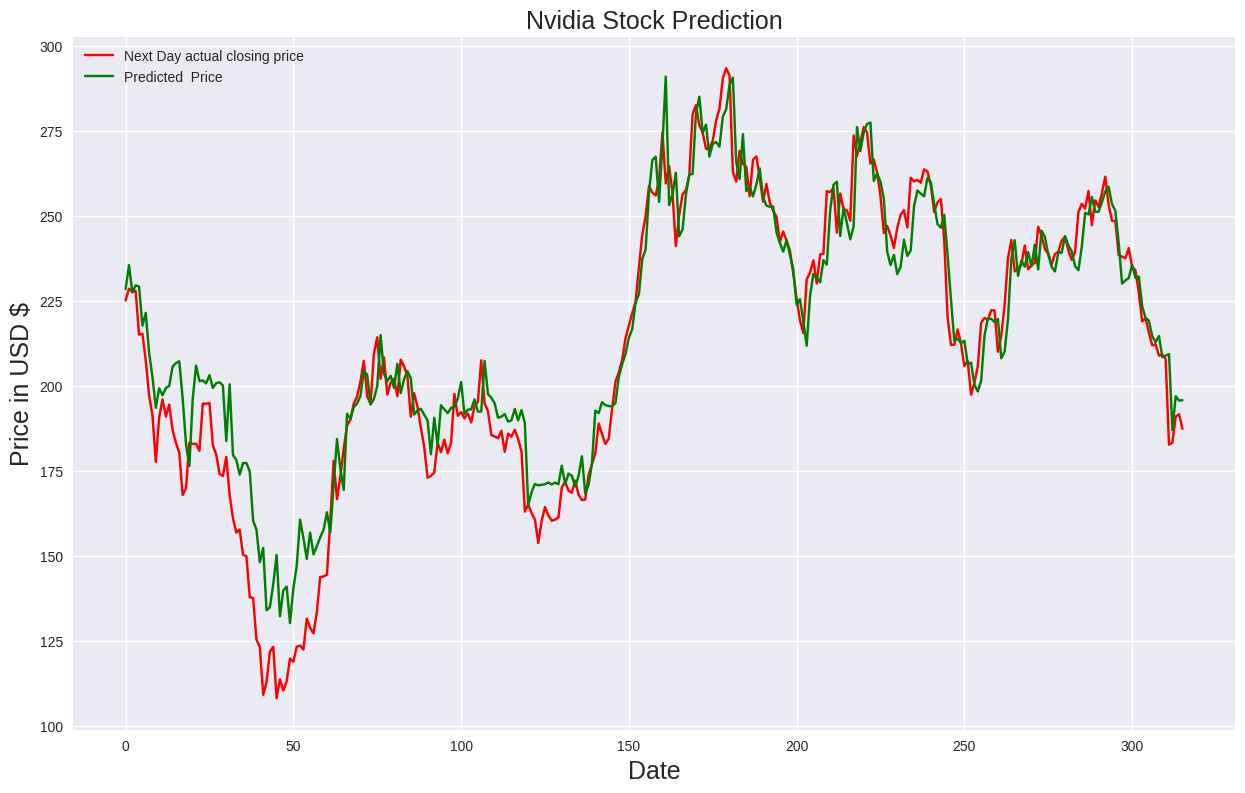

In [61]:
plt.figure(figsize = (15,9))
plt.title("Nvidia Stock Prediction",fontsize = 18)
plt.plot(df_TP['Target'], label ="Next Day actual closing price",color ="red")
plt.plot(df_TP['Pred'],label ="Predicted  Price", color ="green",alpha =1 )
plt.xlabel("Date",fontsize = 18)
plt.legend(loc = "upper left")
plt.ylabel("Price in USD $", fontsize =18)
